### Problem 8: Quantum Principal Component Analysis (QPCA)

**What is QPCA?**

QPCA is the quantum counterpart of classical PCA. It is used to:
- Extract the most significant components (principal components) of a dataset.
- Reduce the dimensionality of data while preserving important features.

In QPCA:

- The dataset is encoded as a quantum density matrix.
- Eigenvalues and eigenvectors of the density matrix represent the principal components.

**Why is it Useful?**
- QPCA can efficiently analyze large datasets encoded in quantum states.
- It serves as a preprocessing step for quantum machine learning algorithms.


**Goal** : Find the principal components of a dataset encoded as quantum states.

**Example Dataset:** 
Encode a 2D dataset:

Data Points: 

Data Points: {(0.2,0.8),(0.5,0.5),(0.8,0.2)}
Each data point corresponds to a quantum state:
∣v_i⟩ = cos(x_i)∣0⟩ + sin(x_i)∣1⟩

**Steps to Solve:**
- **Data Encoding:** Encode the dataset as quantum states.
- **Density Matrix Construction:** Build a density matrix ρ, where ∣v_i⟩ are the quantum states representing the data points.
- **Eigenvalue Decomposition:** Extract the eigenvalues and eigenvectors of ρ. The eigenvectors with the largest eigenvalues are the principal components.
- **Measurement:** Measure the quantum circuit to observe the principal components.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import Sampler

def encode_data(points):
    """Encode dataset into quantum states."""
    states = []
    for x in points:
        qc = QuantumCircuit(1)
        qc.ry(2 * x, 0)
        states.append(Statevector.from_instruction(qc))
    return states



In [2]:
# Step 2: Build Density Matrix
def build_density_matrix(states):
    """Construct density matrix from quantum states."""
    N = len(states)
    rho = sum([np.outer(s.data, s.data.conj()) for s in states]) / N
    return rho

In [3]:

def compute_principal_components(rho):
    """Find eigenvalues and eigenvectors of the density matrix."""
    eigvals, eigvecs = np.linalg.eigh(rho)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    return eigvals, eigvecs

In [4]:
# Data Points
data_points = [0.2, 0.5, 0.8]  # Simplified dataset

# Encode Data
states = encode_data(data_points)

# Build Density Matrix
rho = build_density_matrix(states)

# Compute Principal Components
eigenvalues, eigenvectors = compute_principal_components(rho)

### Expected Output
- **Eigenvalues:** Indicate the importance of each principal component.
- **Eigenvectors:** Represent the directions of the principal components.

In [5]:
# Output Results
print("Eigenvalues (Principal Components' Importance):", eigenvalues)
print("Eigenvectors (Principal Components):")
print(eigenvectors)

Eigenvalues (Principal Components' Importance): [0.94177854 0.05822146]
Eigenvectors (Principal Components):
[[-0.87758256+0.j  0.47942554+0.j]
 [-0.47942554+0.j -0.87758256+0.j]]


### Eigenvalues: [0.94177854, 0.05822146]

#### What do eigenvalues represent?
The eigenvalues indicate how much variance or "information" each principal component captures from the dataset.
Larger eigenvalues correspond to more important principal components.

#### Interpretation:
- The first eigenvalue 0.94177854 is significantly larger than the second eigenvalue 0.05822146.
- This means that the first principal component explains approximately 94.2% of the dataset's variance, while the second explains only 5.8%.
- If you were to reduce the dimensionality of this dataset, you could safely discard the second component without losing much information.
- In the quantum setting, the state corresponding to the first eigenvector is the most significant. 
- Future quantum AI algorithms can leverage this dominant state for efficient data processing.

### EigenVectors:
[[-0.87758256+0.j  0.47942554+0.j]

 [-0.47942554+0.j -0.87758256+0.j]]

#### What do eigenvectors represent?
The eigenvectors represent the directions (or axes) of the principal components in the feature space.Each column of the matrix corresponds to one principal component.

The first eigenvector (corresponding to the largest eigenvalue) defines the direction along which the data has the highest variance.
The second eigenvector (corresponding to the smaller eigenvalue) is orthogonal to the first and captures less variance.

/home/shreyan/Documents/Github/QuantumAI-Noob2Pro/.quantumvenv/lib/python3.12/site-packages/matplotlib/transforms.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


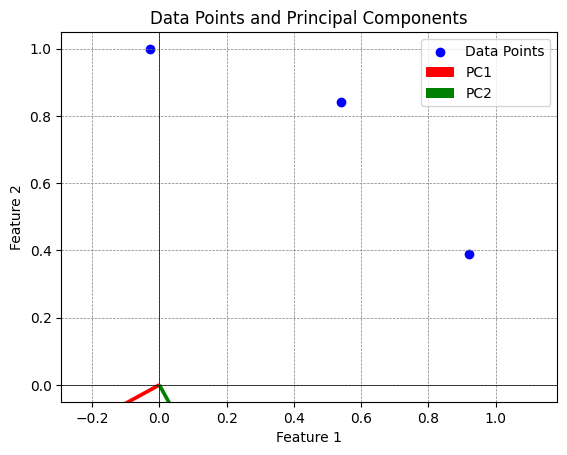

In [6]:
import matplotlib.pyplot as plt

# Visualization of Principal Components in the Feature Plane in 2D
def visualize_principal_components(data_points, eigenvectors):
    # Convert data points to cartesian coordinates for 2D visualization
    cartesian_data = [(np.cos(2 * x), np.sin(2 * x)) for x in data_points]
    x_coords, y_coords = zip(*cartesian_data)

    # Plot the data points
    plt.scatter(x_coords, y_coords, color='blue', label='Data Points')

    # Plot the principal components
    origin = np.array([0, 0])  # Origin for vectors
    pc1 = eigenvectors[:, 0]  # First principal component
    pc2 = eigenvectors[:, 1]  # Second principal component
    plt.quiver(*origin, pc1[0], pc1[1], color='red', angles='xy', scale_units='xy', scale=1, label='PC1')
    plt.quiver(*origin, pc2[0], pc2[1], color='green', angles='xy', scale_units='xy', scale=1, label='PC2')

    # Add labels and legend
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title("Data Points and Principal Components")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.axis('equal')
    plt.show()

# Visualize the principal components
visualize_principal_components(data_points, eigenvectors)